In [9]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D,BatchNormalization

batch_size = 32 
num_classes = 10
#epochs = 1600
data_augmentation = True

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

**CASE 1 - relu,softmax,rmsprop,50 epochs**

In [27]:
model = Sequential()

model.add(Conv2D(32, (3, 3),kernel_initializer='random_normal',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3),kernel_initializer='random_normal',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3),kernel_initializer='random_normal',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(48, (3, 3),kernel_initializer='random_normal',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(48, (3, 3),kernel_initializer='random_normal',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(GlobalMaxPooling2D())
model.add(Dense(500))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
activation_44 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_45 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_46 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 24, 24, 48)        13872     
__________

In [0]:
#opt = keras.optimizers.RMSProp(lr=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer="RMSProp",
              metrics=['accuracy'])

In [6]:
 m1=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=50,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 29s 577us/step - loss: 1.8434 - acc: 0.3000 - val_loss: 1.6786 - val_acc: 0.3849
Epoch 2/50
14976/50000 [=======>......................] - ETA: 17s - loss: 1.5405 - acc: 0.4327

50000/50000 [==============================] - 26s 528us/step - loss: 1.4802 - acc: 0.4564 - val_loss: 1.4622 - val_acc: 0.4710
Epoch 3/50
40160/50000 [=======================>......] - ETA: 4s - loss: 1.3526 - acc: 0.5125

50000/50000 [==============================] - 26s 525us/step - loss: 1.3478 - acc: 0.5149 - val_loss: 1.3957 - val_acc: 0.4979
Epoch 4/50
49984/50000 [============================>.] - ETA: 0s - loss: 1.2545 - acc: 0.5494

50000/50000 [==============================] - 26s 525us/step - loss: 1.2544 - acc: 0.5494 - val_loss: 1.2268 - val_acc: 0.5607
Epoch 5/50
50000/50000 [==============================] - 26s 528us/step - loss: 1.1951 - acc: 0.5762 - val_loss: 1.2232 - val_acc: 0.5689
Epoch 6/50
 1792/50000 [>.............................] - ETA: 24s - loss: 1.1184 - acc: 0.5993

50000/50000 [==============================] - 26s 526us/step - loss: 1.1441 - acc: 0.5914 - val_loss: 1.2678 - val_acc: 0.5534
Epoch 7/50
35296/50000 [====================>.........] - ETA: 7s - loss: 1.0984 - acc: 0.6093

50000/50000 [==============================] - 26s 523us/step - loss: 1.1013 - acc: 0.6090 - val_loss: 1.1733 - val_acc: 0.5845
Epoch 8/50
48128/50000 [===========================>..] - ETA: 0s - loss: 1.0716 - acc: 0.6206

50000/50000 [==============================] - 26s 526us/step - loss: 1.0712 - acc: 0.6207 - val_loss: 1.1560 - val_acc: 0.5961
Epoch 9/50
50000/50000 [==============================] - 26s 524us/step - loss: 1.0385 - acc: 0.6332 - val_loss: 1.0755 - val_acc: 0.6222
Epoch 10/50
 1664/50000 [..............................] - ETA: 24s - loss: 1.0278 - acc: 0.6268

50000/50000 [==============================] - 26s 526us/step - loss: 1.0151 - acc: 0.6398 - val_loss: 1.1377 - val_acc: 0.6118
Epoch 11/50
35584/50000 [====================>.........] - ETA: 7s - loss: 0.9888 - acc: 0.6513

50000/50000 [==============================] - 26s 517us/step - loss: 0.9947 - acc: 0.6480 - val_loss: 1.1037 - val_acc: 0.6154
Epoch 12/50
49120/50000 [============================>.] - ETA: 0s - loss: 0.9742 - acc: 0.6560

50000/50000 [==============================] - 26s 517us/step - loss: 0.9732 - acc: 0.6566 - val_loss: 1.2130 - val_acc: 0.5795
Epoch 13/50
50000/50000 [==============================] - 26s 525us/step - loss: 0.9546 - acc: 0.6626 - val_loss: 1.0991 - val_acc: 0.6206
Epoch 14/50
 1632/50000 [..............................] - ETA: 24s - loss: 0.9326 - acc: 0.6685

50000/50000 [==============================] - 26s 525us/step - loss: 0.9367 - acc: 0.6699 - val_loss: 1.0213 - val_acc: 0.6401
Epoch 15/50
35328/50000 [====================>.........] - ETA: 7s - loss: 0.9135 - acc: 0.6771

50000/50000 [==============================] - 26s 520us/step - loss: 0.9195 - acc: 0.6753 - val_loss: 1.1541 - val_acc: 0.6044
Epoch 16/50
48992/50000 [============================>.] - ETA: 0s - loss: 0.9104 - acc: 0.6780

50000/50000 [==============================] - 26s 516us/step - loss: 0.9104 - acc: 0.6778 - val_loss: 1.0282 - val_acc: 0.6410
Epoch 17/50
50000/50000 [==============================] - 26s 514us/step - loss: 0.8972 - acc: 0.6838 - val_loss: 1.0950 - val_acc: 0.6263
Epoch 18/50
 2560/50000 [>.............................] - ETA: 23s - loss: 0.8383 - acc: 0.7008

50000/50000 [==============================] - 26s 515us/step - loss: 0.8768 - acc: 0.6908 - val_loss: 1.1147 - val_acc: 0.6250
Epoch 19/50
36960/50000 [=====================>........] - ETA: 6s - loss: 0.8598 - acc: 0.6977

50000/50000 [==============================] - 26s 513us/step - loss: 0.8654 - acc: 0.6953 - val_loss: 1.0624 - val_acc: 0.6379
Epoch 20/50
49536/50000 [============================>.] - ETA: 0s - loss: 0.8516 - acc: 0.7001

50000/50000 [==============================] - 26s 513us/step - loss: 0.8531 - acc: 0.6996 - val_loss: 1.0825 - val_acc: 0.6368
Epoch 21/50
50000/50000 [==============================] - 26s 511us/step - loss: 0.8418 - acc: 0.7029 - val_loss: 1.0688 - val_acc: 0.6413
Epoch 22/50
 2848/50000 [>.............................] - ETA: 23s - loss: 0.8070 - acc: 0.7124

50000/50000 [==============================] - 26s 513us/step - loss: 0.8274 - acc: 0.7077 - val_loss: 1.1423 - val_acc: 0.6163
Epoch 23/50
37344/50000 [=====================>........] - ETA: 6s - loss: 0.8140 - acc: 0.7133

50000/50000 [==============================] - 26s 513us/step - loss: 0.8177 - acc: 0.7134 - val_loss: 1.0737 - val_acc: 0.6367
Epoch 24/50
48832/50000 [============================>.] - ETA: 0s - loss: 0.8066 - acc: 0.7168

50000/50000 [==============================] - 26s 524us/step - loss: 0.8069 - acc: 0.7169 - val_loss: 1.0640 - val_acc: 0.6458
Epoch 25/50
50000/50000 [==============================] - 26s 516us/step - loss: 0.7950 - acc: 0.7188 - val_loss: 1.1001 - val_acc: 0.6356
Epoch 26/50
 2304/50000 [>.............................] - ETA: 23s - loss: 0.7552 - acc: 0.7218

50000/50000 [==============================] - 26s 525us/step - loss: 0.7827 - acc: 0.7243 - val_loss: 1.1020 - val_acc: 0.6269
Epoch 27/50
35488/50000 [====================>.........] - ETA: 7s - loss: 0.7684 - acc: 0.7276

50000/50000 [==============================] - 26s 523us/step - loss: 0.7762 - acc: 0.7252 - val_loss: 1.1761 - val_acc: 0.6115
Epoch 28/50
48096/50000 [===========================>..] - ETA: 0s - loss: 0.7633 - acc: 0.7316

50000/50000 [==============================] - 26s 523us/step - loss: 0.7651 - acc: 0.7313 - val_loss: 1.0656 - val_acc: 0.6404
Epoch 29/50
50000/50000 [==============================] - 26s 522us/step - loss: 0.7548 - acc: 0.7356 - val_loss: 1.0806 - val_acc: 0.6375
Epoch 30/50
 1632/50000 [..............................] - ETA: 23s - loss: 0.7516 - acc: 0.7408

50000/50000 [==============================] - 26s 521us/step - loss: 0.7443 - acc: 0.7373 - val_loss: 1.0846 - val_acc: 0.6425
Epoch 31/50
35296/50000 [====================>.........] - ETA: 7s - loss: 0.7281 - acc: 0.7443

50000/50000 [==============================] - 26s 523us/step - loss: 0.7359 - acc: 0.7414 - val_loss: 1.1407 - val_acc: 0.6346
Epoch 32/50
48992/50000 [============================>.] - ETA: 0s - loss: 0.7234 - acc: 0.7447

50000/50000 [==============================] - 26s 513us/step - loss: 0.7245 - acc: 0.7444 - val_loss: 1.1469 - val_acc: 0.6354
Epoch 33/50
50000/50000 [==============================] - 26s 513us/step - loss: 0.7167 - acc: 0.7461 - val_loss: 1.1404 - val_acc: 0.6317
Epoch 34/50
 2400/50000 [>.............................] - ETA: 22s - loss: 0.7014 - acc: 0.7525

50000/50000 [==============================] - 26s 519us/step - loss: 0.7085 - acc: 0.7493 - val_loss: 1.0971 - val_acc: 0.6493
Epoch 35/50
36224/50000 [====================>.........] - ETA: 6s - loss: 0.6967 - acc: 0.7573

50000/50000 [==============================] - 26s 516us/step - loss: 0.7042 - acc: 0.7541 - val_loss: 1.1313 - val_acc: 0.6355
Epoch 36/50
48832/50000 [============================>.] - ETA: 0s - loss: 0.6958 - acc: 0.7559

50000/50000 [==============================] - 26s 515us/step - loss: 0.6981 - acc: 0.7555 - val_loss: 1.0940 - val_acc: 0.6406
Epoch 37/50
50000/50000 [==============================] - 25s 509us/step - loss: 0.6870 - acc: 0.7574 - val_loss: 1.1708 - val_acc: 0.6324
Epoch 38/50
 2528/50000 [>.............................] - ETA: 23s - loss: 0.6597 - acc: 0.7658

50000/50000 [==============================] - 26s 514us/step - loss: 0.6798 - acc: 0.7582 - val_loss: 1.1609 - val_acc: 0.6377
Epoch 39/50
37120/50000 [=====================>........] - ETA: 6s - loss: 0.6671 - acc: 0.7626

50000/50000 [==============================] - 26s 514us/step - loss: 0.6750 - acc: 0.7599 - val_loss: 1.1179 - val_acc: 0.6406
Epoch 40/50
50000/50000 [==============================] - 25s 510us/step - loss: 0.6712 - acc: 0.7636 - val_loss: 1.1501 - val_acc: 0.6264
Epoch 41/50
   32/50000 [..............................] - ETA: 28s - loss: 0.4976 - acc: 0.8438

50000/50000 [==============================] - 26s 512us/step - loss: 0.6568 - acc: 0.7670 - val_loss: 1.1149 - val_acc: 0.6490
Epoch 42/50
36032/50000 [====================>.........] - ETA: 6s - loss: 0.6463 - acc: 0.7712

50000/50000 [==============================] - 26s 517us/step - loss: 0.6519 - acc: 0.7705 - val_loss: 1.1269 - val_acc: 0.6406
Epoch 43/50
49376/50000 [============================>.] - ETA: 0s - loss: 0.6456 - acc: 0.7729

50000/50000 [==============================] - 26s 514us/step - loss: 0.6463 - acc: 0.7727 - val_loss: 1.2010 - val_acc: 0.6372
Epoch 44/50
50000/50000 [==============================] - 26s 516us/step - loss: 0.6440 - acc: 0.7724 - val_loss: 1.1901 - val_acc: 0.6289
Epoch 45/50
 2496/50000 [>.............................] - ETA: 23s - loss: 0.5778 - acc: 0.7869

50000/50000 [==============================] - 26s 518us/step - loss: 0.6377 - acc: 0.7752 - val_loss: 1.1629 - val_acc: 0.6353
Epoch 46/50
36672/50000 [=====================>........] - ETA: 6s - loss: 0.6154 - acc: 0.7827

50000/50000 [==============================] - 26s 519us/step - loss: 0.6260 - acc: 0.7785 - val_loss: 1.1652 - val_acc: 0.6516
Epoch 47/50
49888/50000 [============================>.] - ETA: 0s - loss: 0.6225 - acc: 0.7803

50000/50000 [==============================] - 25s 509us/step - loss: 0.6221 - acc: 0.7805 - val_loss: 1.2031 - val_acc: 0.6423
Epoch 48/50
50000/50000 [==============================] - 26s 515us/step - loss: 0.6148 - acc: 0.7837 - val_loss: 1.1828 - val_acc: 0.6535
Epoch 49/50
 2720/50000 [>.............................] - ETA: 23s - loss: 0.5401 - acc: 0.8096

50000/50000 [==============================] - 26s 513us/step - loss: 0.6129 - acc: 0.7830 - val_loss: 1.1891 - val_acc: 0.6398
Epoch 50/50
35648/50000 [====================>.........] - ETA: 7s - loss: 0.6042 - acc: 0.7865

50000/50000 [==============================] - 26s 524us/step - loss: 0.6106 - acc: 0.7836 - val_loss: 1.2982 - val_acc: 0.6273


In [0]:
import matplotlib.pyplot as plt
import seaborn as sb

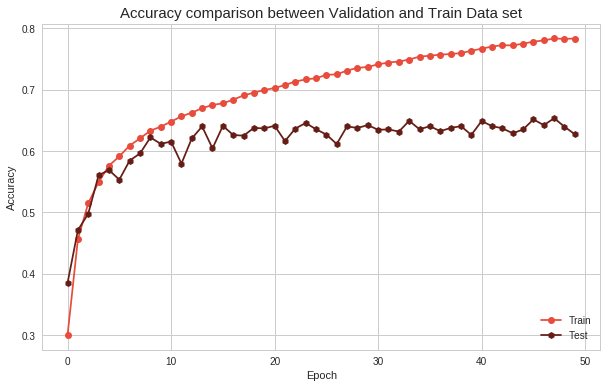

In [8]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m1.history['acc'],color="#E74C3C",marker='o')
plt.plot(m1.history['val_acc'],color='#641E16',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

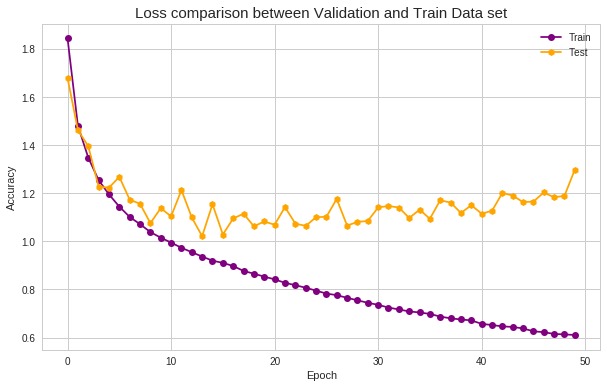

In [9]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m1.history['loss'],color="Purple",marker='o')
plt.plot(m1.history['val_loss'],color='Orange',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

CASE 2 - relu,softmax,adam,epochs-100

In [5]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(48, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(48, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(48, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(128, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(GlobalMaxPooling2D())
model2.add(Dropout(0.25))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_3 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 32)        9248      
__________

In [0]:
opt = keras.optimizers.Adamax(lr=0.001)
model2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [7]:
 m2=model2.fit(x_train, y_train,
              batch_size=500,
              epochs=100,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 30s 595us/step - loss: 2.7217 - acc: 0.2389 - val_loss: 2.2400 - val_acc: 0.2671
Epoch 2/100
50000/50000 [==============================] - 26s 525us/step - loss: 2.0312 - acc: 0.3137 - val_loss: 1.8252 - val_acc: 0.3603
Epoch 3/100
50000/50000 [==============================] - 26s 525us/step - loss: 1.8613 - acc: 0.3566 - val_loss: 1.7192 - val_acc: 0.4011
Epoch 4/100
11500/50000 [=====>........................] - ETA: 18s - loss: 1.7880 - acc: 0.3731

50000/50000 [==============================] - 26s 525us/step - loss: 1.7538 - acc: 0.3859 - val_loss: 1.6115 - val_acc: 0.4158
Epoch 5/100
50000/50000 [==============================] - 26s 525us/step - loss: 1.6668 - acc: 0.4223 - val_loss: 1.5265 - val_acc: 0.4641
Epoch 6/100
50000/50000 [==============================] - 26s 525us/step - loss: 1.5851 - acc: 0.4486 - val_loss: 1.5301 - val_acc: 0.4509
Epoch 7/100
33500/50000 [===================>..........] - ETA: 8s - loss: 1.5138 - acc: 0.4765

50000/50000 [==============================] - 26s 525us/step - loss: 1.5071 - acc: 0.4786 - val_loss: 1.5846 - val_acc: 0.4421
Epoch 8/100
50000/50000 [==============================] - 26s 526us/step - loss: 1.4356 - acc: 0.5034 - val_loss: 1.3607 - val_acc: 0.5248
Epoch 9/100
50000/50000 [==============================] - 26s 524us/step - loss: 1.3569 - acc: 0.5341 - val_loss: 1.3665 - val_acc: 0.5227
Epoch 10/100
37000/50000 [=====================>........] - ETA: 6s - loss: 1.3066 - acc: 0.5502

50000/50000 [==============================] - 26s 526us/step - loss: 1.3033 - acc: 0.5534 - val_loss: 1.2892 - val_acc: 0.5445
Epoch 11/100
50000/50000 [==============================] - 26s 525us/step - loss: 1.2665 - acc: 0.5692 - val_loss: 1.3116 - val_acc: 0.5368
Epoch 12/100
50000/50000 [==============================] - 26s 525us/step - loss: 1.2027 - acc: 0.5903 - val_loss: 1.4024 - val_acc: 0.5029
Epoch 13/100
37000/50000 [=====================>........] - ETA: 6s - loss: 1.1588 - acc: 0.6069

50000/50000 [==============================] - 26s 525us/step - loss: 1.1635 - acc: 0.6053 - val_loss: 1.1926 - val_acc: 0.5993
Epoch 14/100
50000/50000 [==============================] - 26s 525us/step - loss: 1.1197 - acc: 0.6207 - val_loss: 1.0558 - val_acc: 0.6349
Epoch 15/100
50000/50000 [==============================] - 26s 526us/step - loss: 1.0842 - acc: 0.6327 - val_loss: 1.0856 - val_acc: 0.6314
Epoch 16/100
37000/50000 [=====================>........] - ETA: 6s - loss: 1.0499 - acc: 0.6459

50000/50000 [==============================] - 26s 526us/step - loss: 1.0476 - acc: 0.6458 - val_loss: 1.0577 - val_acc: 0.6344
Epoch 17/100
50000/50000 [==============================] - 26s 525us/step - loss: 1.0249 - acc: 0.6557 - val_loss: 1.0126 - val_acc: 0.6446
Epoch 18/100
50000/50000 [==============================] - 26s 526us/step - loss: 1.0087 - acc: 0.6653 - val_loss: 0.9861 - val_acc: 0.6614
Epoch 19/100
37000/50000 [=====================>........] - ETA: 6s - loss: 0.9604 - acc: 0.6770

50000/50000 [==============================] - 26s 527us/step - loss: 0.9598 - acc: 0.6777 - val_loss: 1.1167 - val_acc: 0.6108
Epoch 20/100
50000/50000 [==============================] - 26s 525us/step - loss: 0.9389 - acc: 0.6850 - val_loss: 0.9956 - val_acc: 0.6590
Epoch 21/100
50000/50000 [==============================] - 26s 526us/step - loss: 0.9013 - acc: 0.6956 - val_loss: 1.1608 - val_acc: 0.5940
Epoch 22/100
37000/50000 [=====================>........] - ETA: 6s - loss: 0.8895 - acc: 0.7038

50000/50000 [==============================] - 26s 526us/step - loss: 0.9023 - acc: 0.7013 - val_loss: 0.9862 - val_acc: 0.6588
Epoch 23/100
50000/50000 [==============================] - 26s 525us/step - loss: 0.8621 - acc: 0.7131 - val_loss: 1.0147 - val_acc: 0.6518
Epoch 24/100
50000/50000 [==============================] - 26s 526us/step - loss: 0.8502 - acc: 0.7167 - val_loss: 1.0210 - val_acc: 0.6449
Epoch 25/100
37000/50000 [=====================>........] - ETA: 6s - loss: 0.8140 - acc: 0.7278

50000/50000 [==============================] - 26s 525us/step - loss: 0.8170 - acc: 0.7263 - val_loss: 0.9710 - val_acc: 0.6603
Epoch 26/100
50000/50000 [==============================] - 26s 524us/step - loss: 0.8104 - acc: 0.7285 - val_loss: 0.9695 - val_acc: 0.6672
Epoch 27/100
50000/50000 [==============================] - 26s 525us/step - loss: 0.7970 - acc: 0.7368 - val_loss: 1.1001 - val_acc: 0.6225
Epoch 28/100
37000/50000 [=====================>........] - ETA: 6s - loss: 0.7713 - acc: 0.7445

50000/50000 [==============================] - 26s 524us/step - loss: 0.7753 - acc: 0.7435 - val_loss: 0.9084 - val_acc: 0.6814
Epoch 29/100
50000/50000 [==============================] - 26s 525us/step - loss: 0.7554 - acc: 0.7479 - val_loss: 0.8616 - val_acc: 0.7006
Epoch 30/100
50000/50000 [==============================] - 26s 525us/step - loss: 0.7394 - acc: 0.7560 - val_loss: 0.8729 - val_acc: 0.6993
Epoch 31/100
37000/50000 [=====================>........] - ETA: 6s - loss: 0.7194 - acc: 0.7652

50000/50000 [==============================] - 26s 523us/step - loss: 0.7210 - acc: 0.7622 - val_loss: 0.9410 - val_acc: 0.6820
Epoch 32/100
50000/50000 [==============================] - 26s 525us/step - loss: 0.7142 - acc: 0.7624 - val_loss: 0.8752 - val_acc: 0.7042
Epoch 33/100
50000/50000 [==============================] - 26s 525us/step - loss: 0.6896 - acc: 0.7704 - val_loss: 0.8540 - val_acc: 0.7096
Epoch 34/100
37000/50000 [=====================>........] - ETA: 6s - loss: 0.6853 - acc: 0.7743

50000/50000 [==============================] - 26s 524us/step - loss: 0.6886 - acc: 0.7720 - val_loss: 0.9459 - val_acc: 0.6900
Epoch 35/100
50000/50000 [==============================] - 26s 523us/step - loss: 0.6742 - acc: 0.7762 - val_loss: 0.8260 - val_acc: 0.7225
Epoch 36/100
50000/50000 [==============================] - 26s 523us/step - loss: 0.6532 - acc: 0.7836 - val_loss: 0.8414 - val_acc: 0.7146
Epoch 37/100
37000/50000 [=====================>........] - ETA: 6s - loss: 0.6370 - acc: 0.7895

50000/50000 [==============================] - 26s 521us/step - loss: 0.6432 - acc: 0.7867 - val_loss: 0.8683 - val_acc: 0.7068
Epoch 38/100
50000/50000 [==============================] - 26s 521us/step - loss: 0.6222 - acc: 0.7928 - val_loss: 0.8627 - val_acc: 0.7120
Epoch 39/100
50000/50000 [==============================] - 26s 518us/step - loss: 0.6164 - acc: 0.7958 - val_loss: 0.8654 - val_acc: 0.7083
Epoch 40/100
37000/50000 [=====================>........] - ETA: 6s - loss: 0.6181 - acc: 0.7979

50000/50000 [==============================] - 26s 520us/step - loss: 0.6137 - acc: 0.7984 - val_loss: 0.8825 - val_acc: 0.7084
Epoch 41/100
50000/50000 [==============================] - 26s 519us/step - loss: 0.5947 - acc: 0.8030 - val_loss: 0.8714 - val_acc: 0.7145
Epoch 42/100
50000/50000 [==============================] - 26s 520us/step - loss: 0.5793 - acc: 0.8077 - val_loss: 0.8503 - val_acc: 0.7179
Epoch 43/100
37000/50000 [=====================>........] - ETA: 6s - loss: 0.5684 - acc: 0.8120

50000/50000 [==============================] - 26s 519us/step - loss: 0.5705 - acc: 0.8105 - val_loss: 0.8428 - val_acc: 0.7186
Epoch 44/100
50000/50000 [==============================] - 26s 521us/step - loss: 0.5418 - acc: 0.8197 - val_loss: 0.8835 - val_acc: 0.7137
Epoch 45/100
50000/50000 [==============================] - 26s 520us/step - loss: 0.5398 - acc: 0.8215 - val_loss: 0.8697 - val_acc: 0.7178
Epoch 46/100
37000/50000 [=====================>........] - ETA: 6s - loss: 0.5279 - acc: 0.8275

50000/50000 [==============================] - 26s 520us/step - loss: 0.5387 - acc: 0.8246 - val_loss: 0.8239 - val_acc: 0.7293
Epoch 47/100
50000/50000 [==============================] - 26s 520us/step - loss: 0.5173 - acc: 0.8270 - val_loss: 0.9065 - val_acc: 0.7008
Epoch 48/100
50000/50000 [==============================] - 26s 520us/step - loss: 0.5169 - acc: 0.8290 - val_loss: 0.9256 - val_acc: 0.7094
Epoch 49/100
37000/50000 [=====================>........] - ETA: 6s - loss: 0.4953 - acc: 0.8335

50000/50000 [==============================] - 26s 523us/step - loss: 0.4995 - acc: 0.8325 - val_loss: 0.8917 - val_acc: 0.7191
Epoch 50/100
50000/50000 [==============================] - 26s 524us/step - loss: 0.4953 - acc: 0.8355 - val_loss: 0.8998 - val_acc: 0.7071
Epoch 51/100
50000/50000 [==============================] - 26s 524us/step - loss: 0.4797 - acc: 0.8402 - val_loss: 0.8765 - val_acc: 0.7209
Epoch 52/100
37000/50000 [=====================>........] - ETA: 6s - loss: 0.4678 - acc: 0.8437

50000/50000 [==============================] - 26s 524us/step - loss: 0.4737 - acc: 0.8417 - val_loss: 0.9030 - val_acc: 0.7139
Epoch 53/100
50000/50000 [==============================] - 26s 525us/step - loss: 0.4658 - acc: 0.8437 - val_loss: 0.9782 - val_acc: 0.7011
Epoch 54/100
50000/50000 [==============================] - 26s 524us/step - loss: 0.4711 - acc: 0.8461 - val_loss: 0.9022 - val_acc: 0.7129
Epoch 55/100
37000/50000 [=====================>........] - ETA: 6s - loss: 0.4182 - acc: 0.8600

50000/50000 [==============================] - 26s 523us/step - loss: 0.4255 - acc: 0.8582 - val_loss: 0.8751 - val_acc: 0.7292
Epoch 56/100
50000/50000 [==============================] - 26s 525us/step - loss: 0.4115 - acc: 0.8648 - val_loss: 0.9018 - val_acc: 0.7282
Epoch 57/100
50000/50000 [==============================] - 26s 524us/step - loss: 0.3965 - acc: 0.8692 - val_loss: 0.9216 - val_acc: 0.7212
Epoch 58/100
37000/50000 [=====================>........] - ETA: 6s - loss: 0.3978 - acc: 0.8695

50000/50000 [==============================] - 26s 523us/step - loss: 0.4010 - acc: 0.8674 - val_loss: 0.8957 - val_acc: 0.7211
Epoch 59/100
50000/50000 [==============================] - 26s 522us/step - loss: 0.4008 - acc: 0.8694 - val_loss: 0.8922 - val_acc: 0.7294
Epoch 60/100
50000/50000 [==============================] - 26s 521us/step - loss: 0.3806 - acc: 0.8737 - val_loss: 0.9328 - val_acc: 0.7221
Epoch 61/100
37000/50000 [=====================>........] - ETA: 6s - loss: 0.3675 - acc: 0.8782

50000/50000 [==============================] - 26s 522us/step - loss: 0.3802 - acc: 0.8752 - val_loss: 1.0151 - val_acc: 0.7102
Epoch 62/100
50000/50000 [==============================] - 26s 523us/step - loss: 0.3780 - acc: 0.8764 - val_loss: 1.0079 - val_acc: 0.7107
Epoch 63/100
50000/50000 [==============================] - 26s 521us/step - loss: 0.3594 - acc: 0.8817 - val_loss: 0.9184 - val_acc: 0.7265
Epoch 64/100
37000/50000 [=====================>........] - ETA: 6s - loss: 0.3429 - acc: 0.8888

50000/50000 [==============================] - 26s 520us/step - loss: 0.3457 - acc: 0.8878 - val_loss: 0.9391 - val_acc: 0.7306
Epoch 65/100
50000/50000 [==============================] - 26s 520us/step - loss: 0.3554 - acc: 0.8839 - val_loss: 0.9826 - val_acc: 0.7257
Epoch 66/100
50000/50000 [==============================] - 26s 522us/step - loss: 0.3493 - acc: 0.8868 - val_loss: 0.9278 - val_acc: 0.7331
Epoch 67/100
37000/50000 [=====================>........] - ETA: 6s - loss: 0.3215 - acc: 0.8928

50000/50000 [==============================] - 26s 523us/step - loss: 0.3316 - acc: 0.8899 - val_loss: 0.9802 - val_acc: 0.7279
Epoch 68/100
50000/50000 [==============================] - 26s 522us/step - loss: 0.3312 - acc: 0.8919 - val_loss: 1.0673 - val_acc: 0.7120
Epoch 69/100
50000/50000 [==============================] - 26s 524us/step - loss: 0.3458 - acc: 0.8882 - val_loss: 1.0504 - val_acc: 0.7164
Epoch 70/100
37000/50000 [=====================>........] - ETA: 6s - loss: 0.3143 - acc: 0.8992

50000/50000 [==============================] - 26s 524us/step - loss: 0.3193 - acc: 0.8971 - val_loss: 1.0095 - val_acc: 0.7230
Epoch 71/100
50000/50000 [==============================] - 26s 524us/step - loss: 0.3278 - acc: 0.8927 - val_loss: 1.0450 - val_acc: 0.7199
Epoch 72/100
50000/50000 [==============================] - 26s 523us/step - loss: 0.3216 - acc: 0.8937 - val_loss: 1.0245 - val_acc: 0.7288
Epoch 73/100
37000/50000 [=====================>........] - ETA: 6s - loss: 0.3085 - acc: 0.9001

50000/50000 [==============================] - 26s 525us/step - loss: 0.3122 - acc: 0.8988 - val_loss: 1.0573 - val_acc: 0.7188
Epoch 74/100
50000/50000 [==============================] - 26s 524us/step - loss: 0.3107 - acc: 0.8982 - val_loss: 1.0379 - val_acc: 0.7243
Epoch 75/100
50000/50000 [==============================] - 26s 523us/step - loss: 0.3206 - acc: 0.8961 - val_loss: 1.0556 - val_acc: 0.7121
Epoch 76/100
37000/50000 [=====================>........] - ETA: 6s - loss: 0.2933 - acc: 0.9049

50000/50000 [==============================] - 26s 525us/step - loss: 0.2937 - acc: 0.9052 - val_loss: 1.0262 - val_acc: 0.7242
Epoch 77/100
50000/50000 [==============================] - 26s 524us/step - loss: 0.2899 - acc: 0.9051 - val_loss: 1.0520 - val_acc: 0.7197
Epoch 78/100
50000/50000 [==============================] - 26s 524us/step - loss: 0.2759 - acc: 0.9104 - val_loss: 1.1084 - val_acc: 0.7111
Epoch 79/100
37000/50000 [=====================>........] - ETA: 6s - loss: 0.2844 - acc: 0.9076

50000/50000 [==============================] - 26s 523us/step - loss: 0.2884 - acc: 0.9063 - val_loss: 1.0845 - val_acc: 0.7215
Epoch 80/100
50000/50000 [==============================] - 26s 523us/step - loss: 0.2841 - acc: 0.9081 - val_loss: 1.1923 - val_acc: 0.7036
Epoch 81/100
50000/50000 [==============================] - 26s 524us/step - loss: 0.2747 - acc: 0.9133 - val_loss: 1.1102 - val_acc: 0.7205
Epoch 82/100
37000/50000 [=====================>........] - ETA: 6s - loss: 0.2626 - acc: 0.9167

50000/50000 [==============================] - 26s 525us/step - loss: 0.2701 - acc: 0.9139 - val_loss: 1.1932 - val_acc: 0.7043
Epoch 83/100
50000/50000 [==============================] - 26s 524us/step - loss: 0.2674 - acc: 0.9145 - val_loss: 1.0597 - val_acc: 0.7236
Epoch 84/100
50000/50000 [==============================] - 26s 524us/step - loss: 0.2701 - acc: 0.9133 - val_loss: 1.1421 - val_acc: 0.7052
Epoch 85/100
37000/50000 [=====================>........] - ETA: 6s - loss: 0.2880 - acc: 0.9073

50000/50000 [==============================] - 26s 524us/step - loss: 0.2854 - acc: 0.9079 - val_loss: 1.0853 - val_acc: 0.7234
Epoch 86/100
50000/50000 [==============================] - 26s 523us/step - loss: 0.2410 - acc: 0.9246 - val_loss: 1.0496 - val_acc: 0.7274
Epoch 87/100
50000/50000 [==============================] - 26s 524us/step - loss: 0.2390 - acc: 0.9261 - val_loss: 1.0994 - val_acc: 0.7211
Epoch 88/100
37000/50000 [=====================>........] - ETA: 6s - loss: 0.2388 - acc: 0.9254

50000/50000 [==============================] - 26s 524us/step - loss: 0.2432 - acc: 0.9236 - val_loss: 1.1027 - val_acc: 0.7288
Epoch 89/100
50000/50000 [==============================] - 26s 524us/step - loss: 0.2452 - acc: 0.9227 - val_loss: 1.2095 - val_acc: 0.7120
Epoch 90/100
50000/50000 [==============================] - 26s 524us/step - loss: 0.2531 - acc: 0.9190 - val_loss: 1.1250 - val_acc: 0.7229
Epoch 91/100
37000/50000 [=====================>........] - ETA: 6s - loss: 0.2475 - acc: 0.9230

50000/50000 [==============================] - 26s 523us/step - loss: 0.2508 - acc: 0.9217 - val_loss: 1.2448 - val_acc: 0.7104
Epoch 92/100
50000/50000 [==============================] - 26s 524us/step - loss: 0.2455 - acc: 0.9217 - val_loss: 1.1193 - val_acc: 0.7240
Epoch 93/100
50000/50000 [==============================] - 26s 525us/step - loss: 0.2315 - acc: 0.9272 - val_loss: 1.1374 - val_acc: 0.7199
Epoch 94/100
37000/50000 [=====================>........] - ETA: 6s - loss: 0.2316 - acc: 0.9260

50000/50000 [==============================] - 26s 524us/step - loss: 0.2366 - acc: 0.9244 - val_loss: 1.1674 - val_acc: 0.7236
Epoch 95/100
50000/50000 [==============================] - 26s 524us/step - loss: 0.2268 - acc: 0.9282 - val_loss: 1.1184 - val_acc: 0.7278
Epoch 96/100
50000/50000 [==============================] - 26s 525us/step - loss: 0.2259 - acc: 0.9281 - val_loss: 1.2109 - val_acc: 0.7162
Epoch 97/100
37000/50000 [=====================>........] - ETA: 6s - loss: 0.2164 - acc: 0.9322

50000/50000 [==============================] - 26s 524us/step - loss: 0.2208 - acc: 0.9300 - val_loss: 1.1597 - val_acc: 0.7214
Epoch 98/100
50000/50000 [==============================] - 26s 524us/step - loss: 0.2313 - acc: 0.9278 - val_loss: 1.2048 - val_acc: 0.7255
Epoch 99/100
50000/50000 [==============================] - 26s 525us/step - loss: 0.2328 - acc: 0.9264 - val_loss: 1.1866 - val_acc: 0.7192
Epoch 100/100
37000/50000 [=====================>........] - ETA: 6s - loss: 0.2144 - acc: 0.9331

50000/50000 [==============================] - 26s 524us/step - loss: 0.2222 - acc: 0.9301 - val_loss: 1.1459 - val_acc: 0.7293


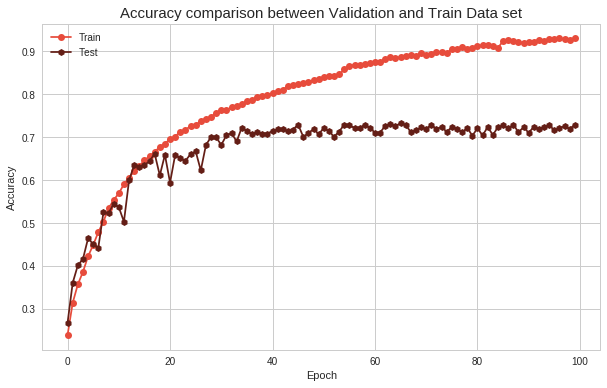

In [15]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m2.history['acc'],color="#E74C3C",marker='o')
plt.plot(m2.history['val_acc'],color='#641E16',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

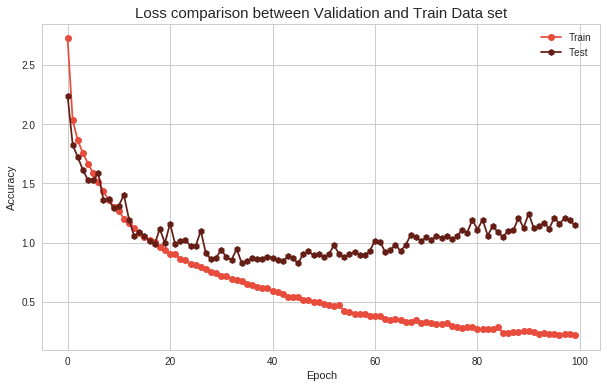

In [14]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m2.history['loss'],color="#E74C3C",marker='o')
plt.plot(m2.history['val_loss'],color='#641E16',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

CASE 3-tanh,softmax,epchs-100,adamax



In [21]:
model3 = Sequential()

model3.add(Conv2D(32, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(Conv2D(32, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(Conv2D(32, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(Conv2D(48, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(Conv2D(48, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(Conv2D(48, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(Conv2D(48, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(GlobalMaxPooling2D())
model3.add(Dense(500))
model3.add(Dropout(0.25))
model3.add(Dense(num_classes))
model3.add(Activation('softmax'))
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
activation_36 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_37 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_38 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 48)        13872     
__________

In [0]:
#opt = keras.optimizers.Adam(lr=0.0001)
model3.compile(loss='categorical_crossentropy',
              optimizer="Adamax",
              metrics=['accuracy'])

In [23]:
 m3=model3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=150,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/150
50000/50000 [==============================] - 37s 742us/step - loss: 1.7332 - acc: 0.3505 - val_loss: 1.4506 - val_acc: 0.4750
Epoch 2/150
 6112/50000 [==>...........................] - ETA: 30s - loss: 1.4781 - acc: 0.4705

50000/50000 [==============================] - 36s 719us/step - loss: 1.4132 - acc: 0.4896 - val_loss: 1.3632 - val_acc: 0.5064
Epoch 3/150
24320/50000 [=============>................] - ETA: 17s - loss: 1.3259 - acc: 0.5214

50000/50000 [==============================] - 37s 734us/step - loss: 1.3091 - acc: 0.5268 - val_loss: 1.2772 - val_acc: 0.5359
Epoch 4/150
30560/50000 [=================>............] - ETA: 13s - loss: 1.2524 - acc: 0.5508

50000/50000 [==============================] - 37s 735us/step - loss: 1.2491 - acc: 0.5541 - val_loss: 1.2356 - val_acc: 0.5493
Epoch 5/150
32896/50000 [==================>...........] - ETA: 11s - loss: 1.2010 - acc: 0.5704

50000/50000 [==============================] - 37s 734us/step - loss: 1.2018 - acc: 0.5705 - val_loss: 1.2132 - val_acc: 0.5597
Epoch 6/150
33728/50000 [===================>..........] - ETA: 11s - loss: 1.1656 - acc: 0.5835

50000/50000 [==============================] - 37s 737us/step - loss: 1.1600 - acc: 0.5862 - val_loss: 1.1594 - val_acc: 0.5774
Epoch 7/150
33088/50000 [==================>...........] - ETA: 11s - loss: 1.1302 - acc: 0.5957

50000/50000 [==============================] - 37s 731us/step - loss: 1.1372 - acc: 0.5933 - val_loss: 1.2183 - val_acc: 0.5637
Epoch 8/150
33792/50000 [===================>..........] - ETA: 11s - loss: 1.1199 - acc: 0.5998

50000/50000 [==============================] - 37s 735us/step - loss: 1.1180 - acc: 0.6015 - val_loss: 1.1442 - val_acc: 0.5883
Epoch 9/150
34176/50000 [===================>..........] - ETA: 10s - loss: 1.0735 - acc: 0.6180

50000/50000 [==============================] - 37s 735us/step - loss: 1.0856 - acc: 0.6138 - val_loss: 1.1529 - val_acc: 0.5908
Epoch 10/150
33408/50000 [===================>..........] - ETA: 11s - loss: 1.0584 - acc: 0.6228

50000/50000 [==============================] - 37s 739us/step - loss: 1.0673 - acc: 0.6209 - val_loss: 1.1790 - val_acc: 0.5752
Epoch 11/150
32736/50000 [==================>...........] - ETA: 12s - loss: 1.0457 - acc: 0.6242

50000/50000 [==============================] - 37s 739us/step - loss: 1.0530 - acc: 0.6230 - val_loss: 1.1270 - val_acc: 0.5934
Epoch 12/150
32832/50000 [==================>...........] - ETA: 12s - loss: 1.0262 - acc: 0.6353

50000/50000 [==============================] - 37s 740us/step - loss: 1.0301 - acc: 0.6339 - val_loss: 1.0872 - val_acc: 0.6110
Epoch 13/150
33568/50000 [===================>..........] - ETA: 11s - loss: 1.0024 - acc: 0.6453

50000/50000 [==============================] - 37s 737us/step - loss: 1.0082 - acc: 0.6426 - val_loss: 1.1133 - val_acc: 0.6100
Epoch 14/150
33632/50000 [===================>..........] - ETA: 11s - loss: 0.9963 - acc: 0.6480

50000/50000 [==============================] - 37s 736us/step - loss: 1.0020 - acc: 0.6445 - val_loss: 1.1256 - val_acc: 0.6012
Epoch 15/150
33312/50000 [==================>...........] - ETA: 11s - loss: 0.9786 - acc: 0.6515

50000/50000 [==============================] - 37s 735us/step - loss: 0.9872 - acc: 0.6489 - val_loss: 1.1042 - val_acc: 0.6061
Epoch 16/150
33856/50000 [===================>..........] - ETA: 11s - loss: 0.9669 - acc: 0.6544

50000/50000 [==============================] - 37s 732us/step - loss: 0.9682 - acc: 0.6551 - val_loss: 1.0983 - val_acc: 0.6069
Epoch 17/150
35520/50000 [====================>.........] - ETA: 9s - loss: 0.9458 - acc: 0.6661

50000/50000 [==============================] - 36s 719us/step - loss: 0.9508 - acc: 0.6647 - val_loss: 1.0853 - val_acc: 0.6132
Epoch 18/150
34592/50000 [===================>..........] - ETA: 10s - loss: 0.9461 - acc: 0.6632

50000/50000 [==============================] - 36s 726us/step - loss: 0.9513 - acc: 0.6603 - val_loss: 1.1052 - val_acc: 0.6074
Epoch 19/150
35200/50000 [====================>.........] - ETA: 10s - loss: 0.9318 - acc: 0.6671

50000/50000 [==============================] - 36s 724us/step - loss: 0.9412 - acc: 0.6638 - val_loss: 1.1025 - val_acc: 0.6094
Epoch 20/150
35392/50000 [====================>.........] - ETA: 9s - loss: 0.9180 - acc: 0.6718 

50000/50000 [==============================] - 36s 722us/step - loss: 0.9329 - acc: 0.6663 - val_loss: 1.0922 - val_acc: 0.6146
Epoch 21/150
35424/50000 [====================>.........] - ETA: 9s - loss: 0.9153 - acc: 0.6758 

50000/50000 [==============================] - 36s 718us/step - loss: 0.9188 - acc: 0.6745 - val_loss: 1.0929 - val_acc: 0.6135
Epoch 22/150
36704/50000 [=====================>........] - ETA: 8s - loss: 0.8989 - acc: 0.6828

50000/50000 [==============================] - 35s 703us/step - loss: 0.9010 - acc: 0.6817 - val_loss: 1.1108 - val_acc: 0.6108
Epoch 23/150
36768/50000 [=====================>........] - ETA: 8s - loss: 0.8886 - acc: 0.6829

50000/50000 [==============================] - 35s 698us/step - loss: 0.8871 - acc: 0.6836 - val_loss: 1.0895 - val_acc: 0.6151
Epoch 24/150
36928/50000 [=====================>........] - ETA: 8s - loss: 0.8648 - acc: 0.6928

50000/50000 [==============================] - 35s 700us/step - loss: 0.8711 - acc: 0.6911 - val_loss: 1.0915 - val_acc: 0.6168
Epoch 25/150
36928/50000 [=====================>........] - ETA: 8s - loss: 0.8710 - acc: 0.6912

50000/50000 [==============================] - 35s 704us/step - loss: 0.8810 - acc: 0.6873 - val_loss: 1.0925 - val_acc: 0.6093
Epoch 26/150
37184/50000 [=====================>........] - ETA: 8s - loss: 0.8652 - acc: 0.6961

50000/50000 [==============================] - 35s 698us/step - loss: 0.8719 - acc: 0.6934 - val_loss: 1.1113 - val_acc: 0.6155
Epoch 27/150
37120/50000 [=====================>........] - ETA: 8s - loss: 0.8575 - acc: 0.6954

50000/50000 [==============================] - 35s 699us/step - loss: 0.8644 - acc: 0.6927 - val_loss: 1.1085 - val_acc: 0.6183
Epoch 28/150
37632/50000 [=====================>........] - ETA: 8s - loss: 0.8455 - acc: 0.6979

50000/50000 [==============================] - 35s 696us/step - loss: 0.8557 - acc: 0.6946 - val_loss: 1.0921 - val_acc: 0.6150
Epoch 29/150
37632/50000 [=====================>........] - ETA: 8s - loss: 0.8500 - acc: 0.6963

50000/50000 [==============================] - 35s 693us/step - loss: 0.8560 - acc: 0.6948 - val_loss: 1.1189 - val_acc: 0.6097
Epoch 30/150
37376/50000 [=====================>........] - ETA: 8s - loss: 0.8436 - acc: 0.6990

50000/50000 [==============================] - 35s 694us/step - loss: 0.8490 - acc: 0.6966 - val_loss: 1.1115 - val_acc: 0.6104
Epoch 31/150
36896/50000 [=====================>........] - ETA: 8s - loss: 0.8346 - acc: 0.7014

50000/50000 [==============================] - 35s 703us/step - loss: 0.8386 - acc: 0.6992 - val_loss: 1.1045 - val_acc: 0.6184
Epoch 32/150
37248/50000 [=====================>........] - ETA: 8s - loss: 0.8256 - acc: 0.7044

50000/50000 [==============================] - 35s 698us/step - loss: 0.8316 - acc: 0.7035 - val_loss: 1.0868 - val_acc: 0.6230
Epoch 33/150
37216/50000 [=====================>........] - ETA: 8s - loss: 0.8248 - acc: 0.7055

50000/50000 [==============================] - 34s 688us/step - loss: 0.8320 - acc: 0.7028 - val_loss: 1.0914 - val_acc: 0.6149
Epoch 34/150
37312/50000 [=====================>........] - ETA: 8s - loss: 0.8228 - acc: 0.7081

50000/50000 [==============================] - 35s 701us/step - loss: 0.8255 - acc: 0.7071 - val_loss: 1.0897 - val_acc: 0.6286
Epoch 35/150
37376/50000 [=====================>........] - ETA: 8s - loss: 0.8040 - acc: 0.7124

50000/50000 [==============================] - 35s 699us/step - loss: 0.8084 - acc: 0.7120 - val_loss: 1.1154 - val_acc: 0.6197
Epoch 36/150
37312/50000 [=====================>........] - ETA: 8s - loss: 0.7987 - acc: 0.7153

50000/50000 [==============================] - 35s 698us/step - loss: 0.8107 - acc: 0.7115 - val_loss: 1.0895 - val_acc: 0.6266
Epoch 37/150
36544/50000 [====================>.........] - ETA: 8s - loss: 0.7944 - acc: 0.7180

50000/50000 [==============================] - 35s 702us/step - loss: 0.8015 - acc: 0.7154 - val_loss: 1.0812 - val_acc: 0.6256
Epoch 38/150
35872/50000 [====================>.........] - ETA: 9s - loss: 0.7890 - acc: 0.7185

50000/50000 [==============================] - 36s 723us/step - loss: 0.8016 - acc: 0.7147 - val_loss: 1.0735 - val_acc: 0.6334
Epoch 39/150
35488/50000 [====================>.........] - ETA: 9s - loss: 0.7971 - acc: 0.7148

50000/50000 [==============================] - 36s 719us/step - loss: 0.8053 - acc: 0.7125 - val_loss: 1.1179 - val_acc: 0.6178
Epoch 40/150
35584/50000 [====================>.........] - ETA: 9s - loss: 0.7785 - acc: 0.7216

50000/50000 [==============================] - 36s 726us/step - loss: 0.7876 - acc: 0.7190 - val_loss: 1.1343 - val_acc: 0.6159
Epoch 41/150
34816/50000 [===================>..........] - ETA: 10s - loss: 0.7789 - acc: 0.7222

50000/50000 [==============================] - 37s 730us/step - loss: 0.7935 - acc: 0.7167 - val_loss: 1.1017 - val_acc: 0.6269
Epoch 42/150
34688/50000 [===================>..........] - ETA: 10s - loss: 0.7845 - acc: 0.7198

50000/50000 [==============================] - 36s 722us/step - loss: 0.7944 - acc: 0.7165 - val_loss: 1.1130 - val_acc: 0.6181
Epoch 43/150
34976/50000 [===================>..........] - ETA: 10s - loss: 0.7750 - acc: 0.7224

50000/50000 [==============================] - 36s 718us/step - loss: 0.7840 - acc: 0.7194 - val_loss: 1.1316 - val_acc: 0.6132
Epoch 44/150
36064/50000 [====================>.........] - ETA: 9s - loss: 0.7775 - acc: 0.7222

50000/50000 [==============================] - 35s 703us/step - loss: 0.7864 - acc: 0.7186 - val_loss: 1.1774 - val_acc: 0.6043
Epoch 45/150
37344/50000 [=====================>........] - ETA: 8s - loss: 0.7748 - acc: 0.7224

50000/50000 [==============================] - 35s 692us/step - loss: 0.7828 - acc: 0.7205 - val_loss: 1.1111 - val_acc: 0.6247
Epoch 46/150
37376/50000 [=====================>........] - ETA: 8s - loss: 0.7794 - acc: 0.7231

50000/50000 [==============================] - 35s 701us/step - loss: 0.7829 - acc: 0.7211 - val_loss: 1.1437 - val_acc: 0.6142
Epoch 47/150
37440/50000 [=====================>........] - ETA: 8s - loss: 0.7758 - acc: 0.7246

50000/50000 [==============================] - 35s 703us/step - loss: 0.7811 - acc: 0.7207 - val_loss: 1.1416 - val_acc: 0.6089
Epoch 48/150
36448/50000 [====================>.........] - ETA: 9s - loss: 0.7610 - acc: 0.7274

50000/50000 [==============================] - 35s 708us/step - loss: 0.7693 - acc: 0.7243 - val_loss: 1.1619 - val_acc: 0.6121
Epoch 49/150
37088/50000 [=====================>........] - ETA: 8s - loss: 0.7562 - acc: 0.7313

50000/50000 [==============================] - 35s 702us/step - loss: 0.7624 - acc: 0.7293 - val_loss: 1.1195 - val_acc: 0.6215
Epoch 50/150
37120/50000 [=====================>........] - ETA: 8s - loss: 0.7562 - acc: 0.7307

50000/50000 [==============================] - 35s 701us/step - loss: 0.7627 - acc: 0.7278 - val_loss: 1.1293 - val_acc: 0.6220
Epoch 51/150
37024/50000 [=====================>........] - ETA: 8s - loss: 0.7559 - acc: 0.7310

50000/50000 [==============================] - 35s 709us/step - loss: 0.7620 - acc: 0.7286 - val_loss: 1.1413 - val_acc: 0.6198
Epoch 52/150
36992/50000 [=====================>........] - ETA: 8s - loss: 0.7448 - acc: 0.7353

50000/50000 [==============================] - 35s 702us/step - loss: 0.7552 - acc: 0.7294 - val_loss: 1.1354 - val_acc: 0.6138
Epoch 53/150
37408/50000 [=====================>........] - ETA: 8s - loss: 0.7527 - acc: 0.7321

50000/50000 [==============================] - 35s 702us/step - loss: 0.7612 - acc: 0.7289 - val_loss: 1.1878 - val_acc: 0.6014
Epoch 54/150
36640/50000 [====================>.........] - ETA: 8s - loss: 0.7441 - acc: 0.7334

50000/50000 [==============================] - 35s 702us/step - loss: 0.7522 - acc: 0.7308 - val_loss: 1.1280 - val_acc: 0.6223
Epoch 55/150
36064/50000 [====================>.........] - ETA: 9s - loss: 0.7422 - acc: 0.7353

50000/50000 [==============================] - 36s 722us/step - loss: 0.7468 - acc: 0.7342 - val_loss: 1.1297 - val_acc: 0.6145
Epoch 56/150
34528/50000 [===================>..........] - ETA: 10s - loss: 0.7272 - acc: 0.7376

50000/50000 [==============================] - 37s 732us/step - loss: 0.7389 - acc: 0.7349 - val_loss: 1.1400 - val_acc: 0.6186
Epoch 57/150
34560/50000 [===================>..........] - ETA: 10s - loss: 0.7356 - acc: 0.7366

50000/50000 [==============================] - 37s 732us/step - loss: 0.7397 - acc: 0.7347 - val_loss: 1.1426 - val_acc: 0.6233
Epoch 58/150
33888/50000 [===================>..........] - ETA: 11s - loss: 0.7339 - acc: 0.7344

50000/50000 [==============================] - 37s 734us/step - loss: 0.7432 - acc: 0.7316 - val_loss: 1.1355 - val_acc: 0.6231
Epoch 59/150
34048/50000 [===================>..........] - ETA: 11s - loss: 0.7302 - acc: 0.7391

50000/50000 [==============================] - 37s 734us/step - loss: 0.7423 - acc: 0.7333 - val_loss: 1.1513 - val_acc: 0.6171
Epoch 60/150
34016/50000 [===================>..........] - ETA: 11s - loss: 0.7262 - acc: 0.7402

50000/50000 [==============================] - 37s 735us/step - loss: 0.7368 - acc: 0.7359 - val_loss: 1.1647 - val_acc: 0.6157
Epoch 61/150
34208/50000 [===================>..........] - ETA: 10s - loss: 0.7305 - acc: 0.7395

50000/50000 [==============================] - 37s 731us/step - loss: 0.7389 - acc: 0.7358 - val_loss: 1.1472 - val_acc: 0.6184
Epoch 62/150
34304/50000 [===================>..........] - ETA: 10s - loss: 0.7209 - acc: 0.7439

50000/50000 [==============================] - 37s 730us/step - loss: 0.7347 - acc: 0.7372 - val_loss: 1.1490 - val_acc: 0.6135
Epoch 63/150
33600/50000 [===================>..........] - ETA: 11s - loss: 0.7239 - acc: 0.7401

50000/50000 [==============================] - 37s 737us/step - loss: 0.7340 - acc: 0.7374 - val_loss: 1.1373 - val_acc: 0.6211
Epoch 64/150
33376/50000 [===================>..........] - ETA: 11s - loss: 0.7259 - acc: 0.7401

50000/50000 [==============================] - 37s 736us/step - loss: 0.7316 - acc: 0.7375 - val_loss: 1.1420 - val_acc: 0.6166
Epoch 65/150
34112/50000 [===================>..........] - ETA: 10s - loss: 0.7195 - acc: 0.7428

50000/50000 [==============================] - 37s 732us/step - loss: 0.7283 - acc: 0.7386 - val_loss: 1.1401 - val_acc: 0.6208
Epoch 66/150
34688/50000 [===================>..........] - ETA: 10s - loss: 0.7171 - acc: 0.7415

50000/50000 [==============================] - 36s 729us/step - loss: 0.7279 - acc: 0.7379 - val_loss: 1.1634 - val_acc: 0.6182
Epoch 67/150
33984/50000 [===================>..........] - ETA: 11s - loss: 0.7088 - acc: 0.7474

50000/50000 [==============================] - 37s 734us/step - loss: 0.7206 - acc: 0.7425 - val_loss: 1.1263 - val_acc: 0.6239
Epoch 68/150
34112/50000 [===================>..........] - ETA: 11s - loss: 0.7165 - acc: 0.7447

50000/50000 [==============================] - 37s 732us/step - loss: 0.7286 - acc: 0.7397 - val_loss: 1.1897 - val_acc: 0.6122
Epoch 69/150
34336/50000 [===================>..........] - ETA: 10s - loss: 0.7160 - acc: 0.7430

50000/50000 [==============================] - 36s 729us/step - loss: 0.7191 - acc: 0.7426 - val_loss: 1.1593 - val_acc: 0.6155
Epoch 70/150
34496/50000 [===================>..........] - ETA: 10s - loss: 0.7196 - acc: 0.7425

50000/50000 [==============================] - 36s 729us/step - loss: 0.7309 - acc: 0.7381 - val_loss: 1.1351 - val_acc: 0.6201
Epoch 71/150
35808/50000 [====================>.........] - ETA: 9s - loss: 0.7200 - acc: 0.7432

50000/50000 [==============================] - 35s 696us/step - loss: 0.7320 - acc: 0.7382 - val_loss: 1.1414 - val_acc: 0.6204
Epoch 72/150
36928/50000 [=====================>........] - ETA: 8s - loss: 0.7241 - acc: 0.7398

50000/50000 [==============================] - 35s 692us/step - loss: 0.7281 - acc: 0.7392 - val_loss: 1.1405 - val_acc: 0.6149
Epoch 73/150
37344/50000 [=====================>........] - ETA: 8s - loss: 0.7125 - acc: 0.7456

50000/50000 [==============================] - 35s 698us/step - loss: 0.7246 - acc: 0.7405 - val_loss: 1.1449 - val_acc: 0.6220
Epoch 74/150
37600/50000 [=====================>........] - ETA: 8s - loss: 0.7329 - acc: 0.7377

50000/50000 [==============================] - 35s 697us/step - loss: 0.7382 - acc: 0.7349 - val_loss: 1.1375 - val_acc: 0.6182
Epoch 75/150
36928/50000 [=====================>........] - ETA: 8s - loss: 0.7142 - acc: 0.7435

50000/50000 [==============================] - 35s 709us/step - loss: 0.7267 - acc: 0.7385 - val_loss: 1.1517 - val_acc: 0.6211
Epoch 76/150
36704/50000 [=====================>........] - ETA: 8s - loss: 0.7243 - acc: 0.7392

50000/50000 [==============================] - 35s 703us/step - loss: 0.7364 - acc: 0.7353 - val_loss: 1.1259 - val_acc: 0.6249
Epoch 77/150
37120/50000 [=====================>........] - ETA: 8s - loss: 0.7293 - acc: 0.7410

50000/50000 [==============================] - 35s 698us/step - loss: 0.7360 - acc: 0.7376 - val_loss: 1.1561 - val_acc: 0.6189
Epoch 78/150
37664/50000 [=====================>........] - ETA: 7s - loss: 0.7253 - acc: 0.7396

50000/50000 [==============================] - 34s 682us/step - loss: 0.7367 - acc: 0.7349 - val_loss: 1.1594 - val_acc: 0.6156
Epoch 79/150
37920/50000 [=====================>........] - ETA: 7s - loss: 0.7268 - acc: 0.7409

50000/50000 [==============================] - 34s 687us/step - loss: 0.7323 - acc: 0.7384 - val_loss: 1.1774 - val_acc: 0.6115
Epoch 80/150
37248/50000 [=====================>........] - ETA: 8s - loss: 0.7326 - acc: 0.7408

50000/50000 [==============================] - 35s 698us/step - loss: 0.7407 - acc: 0.7350 - val_loss: 1.1415 - val_acc: 0.6194
Epoch 81/150
37152/50000 [=====================>........] - ETA: 8s - loss: 0.7275 - acc: 0.7402

50000/50000 [==============================] - 35s 697us/step - loss: 0.7304 - acc: 0.7393 - val_loss: 1.1604 - val_acc: 0.6168
Epoch 82/150
37568/50000 [=====================>........] - ETA: 8s - loss: 0.7218 - acc: 0.7412

50000/50000 [==============================] - 35s 699us/step - loss: 0.7289 - acc: 0.7388 - val_loss: 1.1343 - val_acc: 0.6210
Epoch 83/150
37344/50000 [=====================>........] - ETA: 8s - loss: 0.7267 - acc: 0.7396

50000/50000 [==============================] - 35s 693us/step - loss: 0.7347 - acc: 0.7374 - val_loss: 1.1248 - val_acc: 0.6157
Epoch 84/150
37056/50000 [=====================>........] - ETA: 8s - loss: 0.7162 - acc: 0.7403

50000/50000 [==============================] - 35s 699us/step - loss: 0.7234 - acc: 0.7388 - val_loss: 1.1447 - val_acc: 0.6193
Epoch 85/150
37536/50000 [=====================>........] - ETA: 8s - loss: 0.7322 - acc: 0.7365

50000/50000 [==============================] - 35s 691us/step - loss: 0.7369 - acc: 0.7357 - val_loss: 1.1189 - val_acc: 0.6210
Epoch 86/150
37632/50000 [=====================>........] - ETA: 8s - loss: 0.7390 - acc: 0.7371

50000/50000 [==============================] - 35s 693us/step - loss: 0.7441 - acc: 0.7336 - val_loss: 1.1310 - val_acc: 0.6233
Epoch 87/150
37472/50000 [=====================>........] - ETA: 8s - loss: 0.7271 - acc: 0.7372

50000/50000 [==============================] - 35s 692us/step - loss: 0.7394 - acc: 0.7332 - val_loss: 1.1515 - val_acc: 0.6163
Epoch 88/150
36416/50000 [====================>.........] - ETA: 9s - loss: 0.7294 - acc: 0.7385

50000/50000 [==============================] - 36s 716us/step - loss: 0.7332 - acc: 0.7373 - val_loss: 1.1725 - val_acc: 0.6098
Epoch 89/150
35520/50000 [====================>.........] - ETA: 9s - loss: 0.7260 - acc: 0.7393

50000/50000 [==============================] - 36s 718us/step - loss: 0.7400 - acc: 0.7347 - val_loss: 1.1228 - val_acc: 0.6245
Epoch 90/150
35328/50000 [====================>.........] - ETA: 9s - loss: 0.7300 - acc: 0.7376 

50000/50000 [==============================] - 36s 720us/step - loss: 0.7381 - acc: 0.7338 - val_loss: 1.1486 - val_acc: 0.6153
Epoch 91/150
35200/50000 [====================>.........] - ETA: 10s - loss: 0.7370 - acc: 0.7357

50000/50000 [==============================] - 36s 713us/step - loss: 0.7415 - acc: 0.7342 - val_loss: 1.1491 - val_acc: 0.6201
Epoch 92/150
35776/50000 [====================>.........] - ETA: 9s - loss: 0.7350 - acc: 0.7383

50000/50000 [==============================] - 36s 712us/step - loss: 0.7456 - acc: 0.7349 - val_loss: 1.1773 - val_acc: 0.6119
Epoch 93/150
36864/50000 [=====================>........] - ETA: 8s - loss: 0.7374 - acc: 0.7359

50000/50000 [==============================] - 35s 692us/step - loss: 0.7430 - acc: 0.7347 - val_loss: 1.1517 - val_acc: 0.6146
Epoch 94/150
37344/50000 [=====================>........] - ETA: 8s - loss: 0.7365 - acc: 0.7351

50000/50000 [==============================] - 35s 696us/step - loss: 0.7431 - acc: 0.7330 - val_loss: 1.1342 - val_acc: 0.6134
Epoch 95/150
37504/50000 [=====================>........] - ETA: 8s - loss: 0.7452 - acc: 0.7319

50000/50000 [==============================] - 35s 693us/step - loss: 0.7475 - acc: 0.7311 - val_loss: 1.1430 - val_acc: 0.6191
Epoch 96/150
37504/50000 [=====================>........] - ETA: 8s - loss: 0.7391 - acc: 0.7353

50000/50000 [==============================] - 35s 692us/step - loss: 0.7449 - acc: 0.7328 - val_loss: 1.1653 - val_acc: 0.6166
Epoch 97/150
37536/50000 [=====================>........] - ETA: 8s - loss: 0.7507 - acc: 0.7315

50000/50000 [==============================] - 35s 695us/step - loss: 0.7526 - acc: 0.7311 - val_loss: 1.1402 - val_acc: 0.6179
Epoch 98/150
37664/50000 [=====================>........] - ETA: 8s - loss: 0.7411 - acc: 0.7341

50000/50000 [==============================] - 35s 695us/step - loss: 0.7469 - acc: 0.7323 - val_loss: 1.1602 - val_acc: 0.6123
Epoch 99/150
37632/50000 [=====================>........] - ETA: 8s - loss: 0.7509 - acc: 0.7336

50000/50000 [==============================] - 35s 695us/step - loss: 0.7543 - acc: 0.7310 - val_loss: 1.1481 - val_acc: 0.6157
Epoch 100/150
37408/50000 [=====================>........] - ETA: 8s - loss: 0.7532 - acc: 0.7328

50000/50000 [==============================] - 35s 703us/step - loss: 0.7593 - acc: 0.7302 - val_loss: 1.1539 - val_acc: 0.6138
Epoch 101/150
36352/50000 [====================>.........] - ETA: 9s - loss: 0.7526 - acc: 0.7291

50000/50000 [==============================] - 35s 699us/step - loss: 0.7585 - acc: 0.7271 - val_loss: 1.1464 - val_acc: 0.6079
Epoch 102/150
37280/50000 [=====================>........] - ETA: 8s - loss: 0.7623 - acc: 0.7269

50000/50000 [==============================] - 34s 687us/step - loss: 0.7628 - acc: 0.7269 - val_loss: 1.1502 - val_acc: 0.6106
Epoch 103/150
37472/50000 [=====================>........] - ETA: 8s - loss: 0.7409 - acc: 0.7324

50000/50000 [==============================] - 34s 678us/step - loss: 0.7461 - acc: 0.7310 - val_loss: 1.1434 - val_acc: 0.6175
Epoch 104/150
37440/50000 [=====================>........] - ETA: 8s - loss: 0.7483 - acc: 0.7292

50000/50000 [==============================] - 34s 689us/step - loss: 0.7551 - acc: 0.7276 - val_loss: 1.1690 - val_acc: 0.6117
Epoch 105/150
37408/50000 [=====================>........] - ETA: 8s - loss: 0.7535 - acc: 0.7296

50000/50000 [==============================] - 35s 694us/step - loss: 0.7632 - acc: 0.7254 - val_loss: 1.1370 - val_acc: 0.6182
Epoch 106/150
36576/50000 [====================>.........]

50000/50000 [==============================] - 36s 712us/step - loss: 0.7593 - acc: 0.7264 - val_loss: 1.1456 - val_acc: 0.6177
Epoch 107/150
35552/50000 [====================>.........] - ETA: 9s - loss: 0.7578 - acc: 0.7301

50000/50000 [==============================] - 36s 716us/step - loss: 0.7648 - acc: 0.7272 - val_loss: 1.1604 - val_acc: 0.6114
Epoch 108/150
36064/50000 [====================>.........] - ETA: 9s - loss: 0.7695 - acc: 0.7234

50000/50000 [==============================] - 36s 712us/step - loss: 0.7702 - acc: 0.7241 - val_loss: 1.1387 - val_acc: 0.6213
Epoch 109/150
35232/50000 [====================>.........] - ETA: 9s - loss: 0.7548 - acc: 0.7271 

50000/50000 [==============================] - 36s 715us/step - loss: 0.7654 - acc: 0.7246 - val_loss: 1.1520 - val_acc: 0.6062
Epoch 110/150
35552/50000 [====================>.........] - ETA: 9s - loss: 0.7672 - acc: 0.7224

50000/50000 [==============================] - 35s 709us/step - loss: 0.7690 - acc: 0.7220 - val_loss: 1.1411 - val_acc: 0.6185
Epoch 111/150
35968/50000 [====================>.........] - ETA: 9s - loss: 0.7669 - acc: 0.7250

50000/50000 [==============================] - 35s 705us/step - loss: 0.7760 - acc: 0.7217 - val_loss: 1.1341 - val_acc: 0.6191
Epoch 112/150
36640/50000 [====================>.........] - ETA: 8s - loss: 0.7851 - acc: 0.7176

50000/50000 [==============================] - 35s 707us/step - loss: 0.7792 - acc: 0.7197 - val_loss: 1.1363 - val_acc: 0.6207
Epoch 113/150
36160/50000 [====================>.........] - ETA: 9s - loss: 0.7754 - acc: 0.7233

50000/50000 [==============================] - 36s 711us/step - loss: 0.7821 - acc: 0.7204 - val_loss: 1.1644 - val_acc: 0.6053
Epoch 114/150
36000/50000 [====================>.........] - ETA: 9s - loss: 0.7722 - acc: 0.7240

50000/50000 [==============================] - 36s 711us/step - loss: 0.7747 - acc: 0.7224 - val_loss: 1.1436 - val_acc: 0.6116
Epoch 115/150
36800/50000 [=====================>........] - ETA: 8s - loss: 0.7660 - acc: 0.7261

50000/50000 [==============================] - 35s 704us/step - loss: 0.7687 - acc: 0.7246 - val_loss: 1.1479 - val_acc: 0.6151
Epoch 116/150
37024/50000 [=====================>........] - ETA: 8s - loss: 0.7600 - acc: 0.7264

50000/50000 [==============================] - 35s 707us/step - loss: 0.7689 - acc: 0.7230 - val_loss: 1.1476 - val_acc: 0.6140
Epoch 117/150
36960/50000 [=====================>........] - ETA: 8s - loss: 0.7671 - acc: 0.7240

50000/50000 [==============================] - 35s 706us/step - loss: 0.7766 - acc: 0.7223 - val_loss: 1.1669 - val_acc: 0.6067
Epoch 118/150
37088/50000 [=====================>........] - ETA: 8s - loss: 0.7752 - acc: 0.7252

50000/50000 [==============================] - 36s 714us/step - loss: 0.7800 - acc: 0.7227 - val_loss: 1.1103 - val_acc: 0.6236
Epoch 119/150
36032/50000 [====================>.........] - ETA: 9s - loss: 0.7663 - acc: 0.7255

50000/50000 [==============================] - 36s 720us/step - loss: 0.7703 - acc: 0.7241 - val_loss: 1.1358 - val_acc: 0.6170
Epoch 120/150
36192/50000 [====================>.........] - ETA: 9s - loss: 0.7787 - acc: 0.7217

50000/50000 [==============================] - 35s 707us/step - loss: 0.7872 - acc: 0.7188 - val_loss: 1.1400 - val_acc: 0.6122
Epoch 121/150
36192/50000 [====================>.........] - ETA: 9s - loss: 0.7733 - acc: 0.7236

50000/50000 [==============================] - 35s 710us/step - loss: 0.7779 - acc: 0.7232 - val_loss: 1.1592 - val_acc: 0.6057
Epoch 122/150
35744/50000 [====================>.........] - ETA: 9s - loss: 0.7732 - acc: 0.7242

50000/50000 [==============================] - 35s 709us/step - loss: 0.7790 - acc: 0.7223 - val_loss: 1.1456 - val_acc: 0.6129
Epoch 123/150
36032/50000 [====================>.........] - ETA: 9s - loss: 0.7785 - acc: 0.7211

50000/50000 [==============================] - 36s 714us/step - loss: 0.7889 - acc: 0.7168 - val_loss: 1.1404 - val_acc: 0.6099
Epoch 124/150
34560/50000 [===================>..........] - ETA: 10s - loss: 0.7722 - acc: 0.7247

50000/50000 [==============================] - 36s 728us/step - loss: 0.7835 - acc: 0.7209 - val_loss: 1.1351 - val_acc: 0.6102
Epoch 125/150
35872/50000 [====================>.........] - ETA: 9s - loss: 0.7845 - acc: 0.7199

50000/50000 [==============================] - 36s 712us/step - loss: 0.7910 - acc: 0.7177 - val_loss: 1.1618 - val_acc: 0.6106
Epoch 126/150
36224/50000 [====================>.........] - ETA: 9s - loss: 0.7886 - acc: 0.7176

50000/50000 [==============================] - 35s 710us/step - loss: 0.7888 - acc: 0.7174 - val_loss: 1.1507 - val_acc: 0.6144
Epoch 127/150
36352/50000 [====================>.........] - ETA: 9s - loss: 0.7838 - acc: 0.7192

50000/50000 [==============================] - 36s 713us/step - loss: 0.7892 - acc: 0.7186 - val_loss: 1.1175 - val_acc: 0.6230
Epoch 128/150
36480/50000 [====================>.........] - ETA: 9s - loss: 0.7779 - acc: 0.7200

50000/50000 [==============================] - 36s 712us/step - loss: 0.7875 - acc: 0.7168 - val_loss: 1.1311 - val_acc: 0.6149
Epoch 129/150
34208/50000 [===================>..........] - ETA: 10s - loss: 0.7738 - acc: 0.7208

50000/50000 [==============================] - 36s 721us/step - loss: 0.7860 - acc: 0.7178 - val_loss: 1.1316 - val_acc: 0.6222
Epoch 130/150
34688/50000 [===================>..........] - ETA: 10s - loss: 0.7924 - acc: 0.7167

50000/50000 [==============================] - 36s 719us/step - loss: 0.7953 - acc: 0.7154 - val_loss: 1.1206 - val_acc: 0.6209
Epoch 131/150
34848/50000 [===================>..........] - ETA: 10s - loss: 0.7880 - acc: 0.7177

50000/50000 [==============================] - 36s 721us/step - loss: 0.7977 - acc: 0.7144 - val_loss: 1.1219 - val_acc: 0.6178
Epoch 132/150
35264/50000 [====================>.........] - ETA: 10s - loss: 0.7899 - acc: 0.7171

50000/50000 [==============================] - 36s 718us/step - loss: 0.7960 - acc: 0.7153 - val_loss: 1.1380 - val_acc: 0.6152
Epoch 133/150
35360/50000 [====================>.........] - ETA: 9s - loss: 0.7930 - acc: 0.7183

50000/50000 [==============================] - 36s 716us/step - loss: 0.8001 - acc: 0.7159 - val_loss: 1.1267 - val_acc: 0.6131
Epoch 134/150
35488/50000 [====================>.........] - ETA: 9s - loss: 0.7944 - acc: 0.7168

50000/50000 [==============================] - 36s 716us/step - loss: 0.7978 - acc: 0.7157 - val_loss: 1.1320 - val_acc: 0.6165
Epoch 135/150
35712/50000 [====================>.........] - ETA: 9s - loss: 0.7995 - acc: 0.7116

50000/50000 [==============================] - 36s 715us/step - loss: 0.8024 - acc: 0.7111 - val_loss: 1.1517 - val_acc: 0.6092
Epoch 136/150
34944/50000 [===================>..........] - ETA: 10s - loss: 0.8074 - acc: 0.7119

50000/50000 [==============================] - 36s 724us/step - loss: 0.8147 - acc: 0.7077 - val_loss: 1.1449 - val_acc: 0.6088
Epoch 137/150
34752/50000 [===================>..........] - ETA: 10s - loss: 0.7975 - acc: 0.7137

50000/50000 [==============================] - 36s 728us/step - loss: 0.8024 - acc: 0.7131 - val_loss: 1.1505 - val_acc: 0.6115
Epoch 138/150
35168/50000 [====================>.........] - ETA: 9s - loss: 0.8060 - acc: 0.7103 

50000/50000 [==============================] - 36s 712us/step - loss: 0.8074 - acc: 0.7102 - val_loss: 1.1366 - val_acc: 0.6150
Epoch 139/150
35104/50000 [====================>.........] - ETA: 10s - loss: 0.7988 - acc: 0.7144

50000/50000 [==============================] - 36s 714us/step - loss: 0.8066 - acc: 0.7104 - val_loss: 1.1705 - val_acc: 0.6005
Epoch 140/150
35168/50000 [====================>.........] - ETA: 10s - loss: 0.7994 - acc: 0.7149

50000/50000 [==============================] - 36s 713us/step - loss: 0.8086 - acc: 0.7101 - val_loss: 1.1373 - val_acc: 0.6149
Epoch 141/150
35872/50000 [====================>.........] - ETA: 9s - loss: 0.8014 - acc: 0.7163

50000/50000 [==============================] - 36s 713us/step - loss: 0.8032 - acc: 0.7137 - val_loss: 1.1399 - val_acc: 0.6110
Epoch 142/150
36288/50000 [====================>.........] - ETA: 9s - loss: 0.7991 - acc: 0.7114

50000/50000 [==============================] - 36s 711us/step - loss: 0.8100 - acc: 0.7082 - val_loss: 1.1267 - val_acc: 0.6105
Epoch 143/150
35584/50000 [====================>.........] - ETA: 9s - loss: 0.8244 - acc: 0.7043

50000/50000 [==============================] - 36s 717us/step - loss: 0.8304 - acc: 0.7021 - val_loss: 1.1225 - val_acc: 0.6159
Epoch 144/150
35168/50000 [====================>.........] - ETA: 10s - loss: 0.8278 - acc: 0.7038

50000/50000 [==============================] - 36s 714us/step - loss: 0.8320 - acc: 0.7031 - val_loss: 1.1601 - val_acc: 0.6092
Epoch 145/150
35424/50000 [====================>.........] - ETA: 9s - loss: 0.8135 - acc: 0.7104

50000/50000 [==============================] - 36s 712us/step - loss: 0.8221 - acc: 0.7077 - val_loss: 1.1503 - val_acc: 0.6090
Epoch 146/150
35392/50000 [====================>.........] - ETA: 9s - loss: 0.8266 - acc: 0.7046

50000/50000 [==============================] - 36s 711us/step - loss: 0.8361 - acc: 0.7012 - val_loss: 1.1110 - val_acc: 0.6152
Epoch 147/150
35392/50000 [====================>.........] - ETA: 9s - loss: 0.8297 - acc: 0.7038

50000/50000 [==============================] - 36s 711us/step - loss: 0.8377 - acc: 0.7012 - val_loss: 1.1483 - val_acc: 0.6013
Epoch 148/150
36160/50000 [====================>.........] - ETA: 9s - loss: 0.8419 - acc: 0.7008

50000/50000 [==============================] - 36s 711us/step - loss: 0.8484 - acc: 0.6988 - val_loss: 1.1237 - val_acc: 0.6154
Epoch 149/150
35488/50000 [====================>.........] - ETA: 9s - loss: 0.8520 - acc: 0.6951

50000/50000 [==============================] - 36s 714us/step - loss: 0.8505 - acc: 0.6944 - val_loss: 1.1033 - val_acc: 0.6249
Epoch 150/150
35776/50000 [====================>.........] - ETA: 9s - loss: 0.8396 - acc: 0.6983

50000/50000 [==============================] - 36s 712us/step - loss: 0.8453 - acc: 0.6967 - val_loss: 1.1318 - val_acc: 0.6104


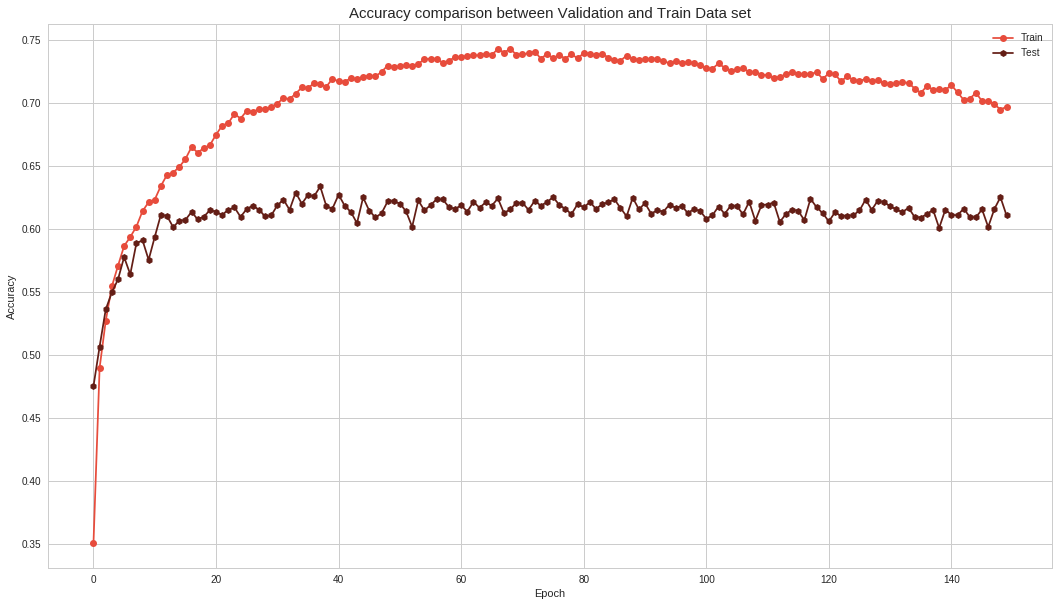

In [24]:
plt.figure(figsize=(18,10))
sb.set_style("whitegrid")
plt.plot(m3.history['acc'],color="#E74C3C",marker='o')
plt.plot(m3.history['val_acc'],color='#641E16',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

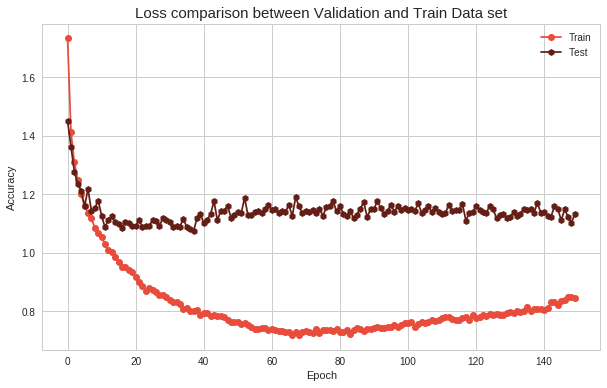

In [25]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m3.history['loss'],color="#E74C3C",marker='o')
plt.plot(m3.history['val_loss'],color='#641E16',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()